### Import Data & Library

In [34]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('C:\\Users\\jkurn\\Documents\\Weather Analysis\\denpasar_weather_short.csv')
df = df[~df["weather_main"].isin(["Drizzle","Haze","Mist","Smoke","Clear","Thunderstorm"])] 
weather = df.iloc[:, [0,5,8,9,10,11,26,27]]
weather.head()

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description
0,1/1/2019 0:00,27.13,1010.0,94,0.5,0,Rain,light rain
1,1/1/2019 1:00,27.77,1010.0,88,2.1,240,Rain,light rain
2,1/1/2019 2:00,29.53,1010.0,83,3.1,240,Clouds,few clouds
3,1/1/2019 3:00,30.13,1010.0,79,4.1,260,Clouds,few clouds
4,1/1/2019 4:00,30.15,1009.0,79,4.1,260,Clouds,few clouds


#### Data Understanding

Hari ini ketika kita melihat ke langit warna biru mendominasi keadaan di ata kita, namun tidak selamanya cerahnya hari akan selalu kita rasakan, bisa saja besok menjadi gelap. Begitu pula dengan suhu bisa saja hari ini suhu udara sangat panas namun besok menjadi dingin. Perubahan perubahan itu yang kita sebut dengan Cuaca. Cuaca di berbagai tempat belahan dunia manapun dapat berubah sewaktu-waktu dalam hitungan hari, jam, bahkan menit. 

Cuaca dan perubahannya dapat dikendalikan oleh beberapa faktor alam yang mengiringinya seperti :
1. Suhu/Temperatur (temp): 
Suhu atau temperatur adalah besaran untuk menyatakan derajat panas atau dingin. Manusia bisa merasakan kondisi panas atau dingin melalui organ tubuh atau indera yang dimilikinya, namun tidak bisa menentukan besarannya secara langsung. Cuaca ini akan diukur dengan satuan derajat celcius.

2. Tekanan udara (Pressure): 
Tekanan udara disebut juga air pressure, merupakan komponen penting yang memengaruhi cuaca dan iklim di suatu wilayah. Air pressure berperan dalam menggerakkan udara dari satu wilayah ke wilayah lain, membawa awan, juga mendorong terciptanya hujan. Tekanan udara diukur dengan alat bernama barometer. Alat ini bekerja secara otomatis, dan penggunanya bisa langsung melihat skala yang muncul. satuan yang digunakan adalah hecto pascal hPa.

3. Kelembapan (Humidity) :
Kelembapan udara adalah kandungan uap air yang ada di dalam udara. Jumlah uap air yang ada dalam udara ini sebenarnya hanya sebagian kecil dari seluruh atmosfer. Kira-kira sekitar 2 persen dari jumlah massa. Akan tetapi, uap air tersebut merupakan salah satu komponen udara yang sangat penting, ditinjau dari segi cuaca dan iklim. satuan yang digunakan adalah persentase (%).

4. Kecepatan Angin (Wind Speed)
Adalah satuan yang mengukur kecepatan aliran udara dari tekanan tinggi ke tekanan rendah dan diukur dengan menggunakan anemometer atau dapat diklasifikasikan dengan menggunakan skala Beaufort yang didasarkan pada pengamatan pengaruh spesifik dari kecepatan angin tertentu.  diukur dengan satuan meter per detik m/s.

5. Arah Angin (Wind Degree)
Arah angin diukur dalam derajat searah jarum jam dari arah utara. Akibatnya, angin yang bertiup dari utara memiliki arah angin 0° (360°); angin yang bertiup dari timur memiliki arah angin 90°; angin bertiup dari selatan memiliki arah angin 180°; dan angin yang bertiup dari barat memiliki arah angin 270°. Secara umum, arah angin diukur dalam satuan dari 0° hingga 360°, tetapi dapat juga dinyatakan dari -180° hingga 180°. diukur dengan satuan derajat.

6. Cuaca (weather_main)
Pengggambaran Kondisi Cuaca yang terdapat pada suatu tempat dengan dideskripsikan oleh beberrapa jenis cuaca antara lain: Rain, Clouds, Thunderstorm, Clean, Haze, Dust, Fog, Mist, Squall, Tornado, Smoke, Drizzle, Ash.


Pada artikel ini akan dilakukan analisa terhadap cuaca pada Kota Denpasar yang dipengaruhi oleh faktor-faktor di atas, dengan horizon data selama 20 tahun antara 1990 s,d Januari 2020 yang diukur secara konsisten per Jam.

Sumber data yang digunakan adalah data yang berasal dari https://openweathermap.org/ yang telah dikompilasi oleh Rudy Hendrawan via Kaggle.

Analisa kali ini dilakukan dengan tujuan untuk mendapatkan klasifikasi atas berbagai jenis cuaca berdasarkan parameter-parameter yang terlah di tentukan. Hasil dari analisa dapat digunakan untuk berbagai kepentiagan baik komersil maupun non komersil. seperti :
Pencegahan bencana alam, Kegiatan Pertanian, arus transportasi terutama (laut dan udara), Partiwisata, Kegiatan keseharian, dll.

### Exploratory Data Analysis (Phase 1)

In [3]:
# Distribusi
# Outlier
# Check Imbalance
# One Variate Analysis
# Bi Variate Analysis

Ekslporasi data pada keseluruhan dataset dilakukan untuk mengetahui deskripsi dan kakteristik dari keseluruhan data sebelum dilakukan spliting untuk pemodelan. Dibawah ini beebrapa pemaparan analisa data yang digunakan.

In [3]:
# Deskriptif Statistik
round(weather.describe(),2)

,temp,pressure,humidity,wind_speed,wind_deg
count,8809.00,8809.00,8809.00,8809.00,8809.00
mean,27.46,1010.79,82.26,3.95,155.30
std,2.00,2.19,8.52,2.18,96.13
min,20.89,1004.00,52.00,0.41,0.00
25%,26.00,1009.00,76.00,2.10,100.00
50%,27.26,1011.00,83.00,3.60,120.00
75%,28.89,1012.00,88.00,5.70,250.00
max,34.13,1017.00,100.00,13.90,360.00


Secara umum hal yang dapat dijelaskan berdasarkan deskripsi statistik data di atas antara lain:
1. Setiap feature memiliki data yang sama panjang yaitu 264.924 data, hal ini mengindikasikan  data tersebut telah terisi secara lengkap. untuk lebih jelasnya dapat kita lihat pada pengecekan missing value nanti.
2. Selama 20 Tahun ke belakang, rata-rata suhu perjam Kota Denpasar sebesar 27.27 derajat celcius (dapat dikatakan cukup hangat) , dengan tekanan udara sebesar 1010.03 hPa dan kelembapan sebesar 80.84% dimana hal ini dapat dikatakan cukup lembap, kecepatan angin bergerak sebesar 3,61 m/s tidak terlalu kencang.

Selanjutnya akan dilihat bagaimana distribusi cuaca tersebut serta apakah terdapat Outlier pada data tersebut.

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

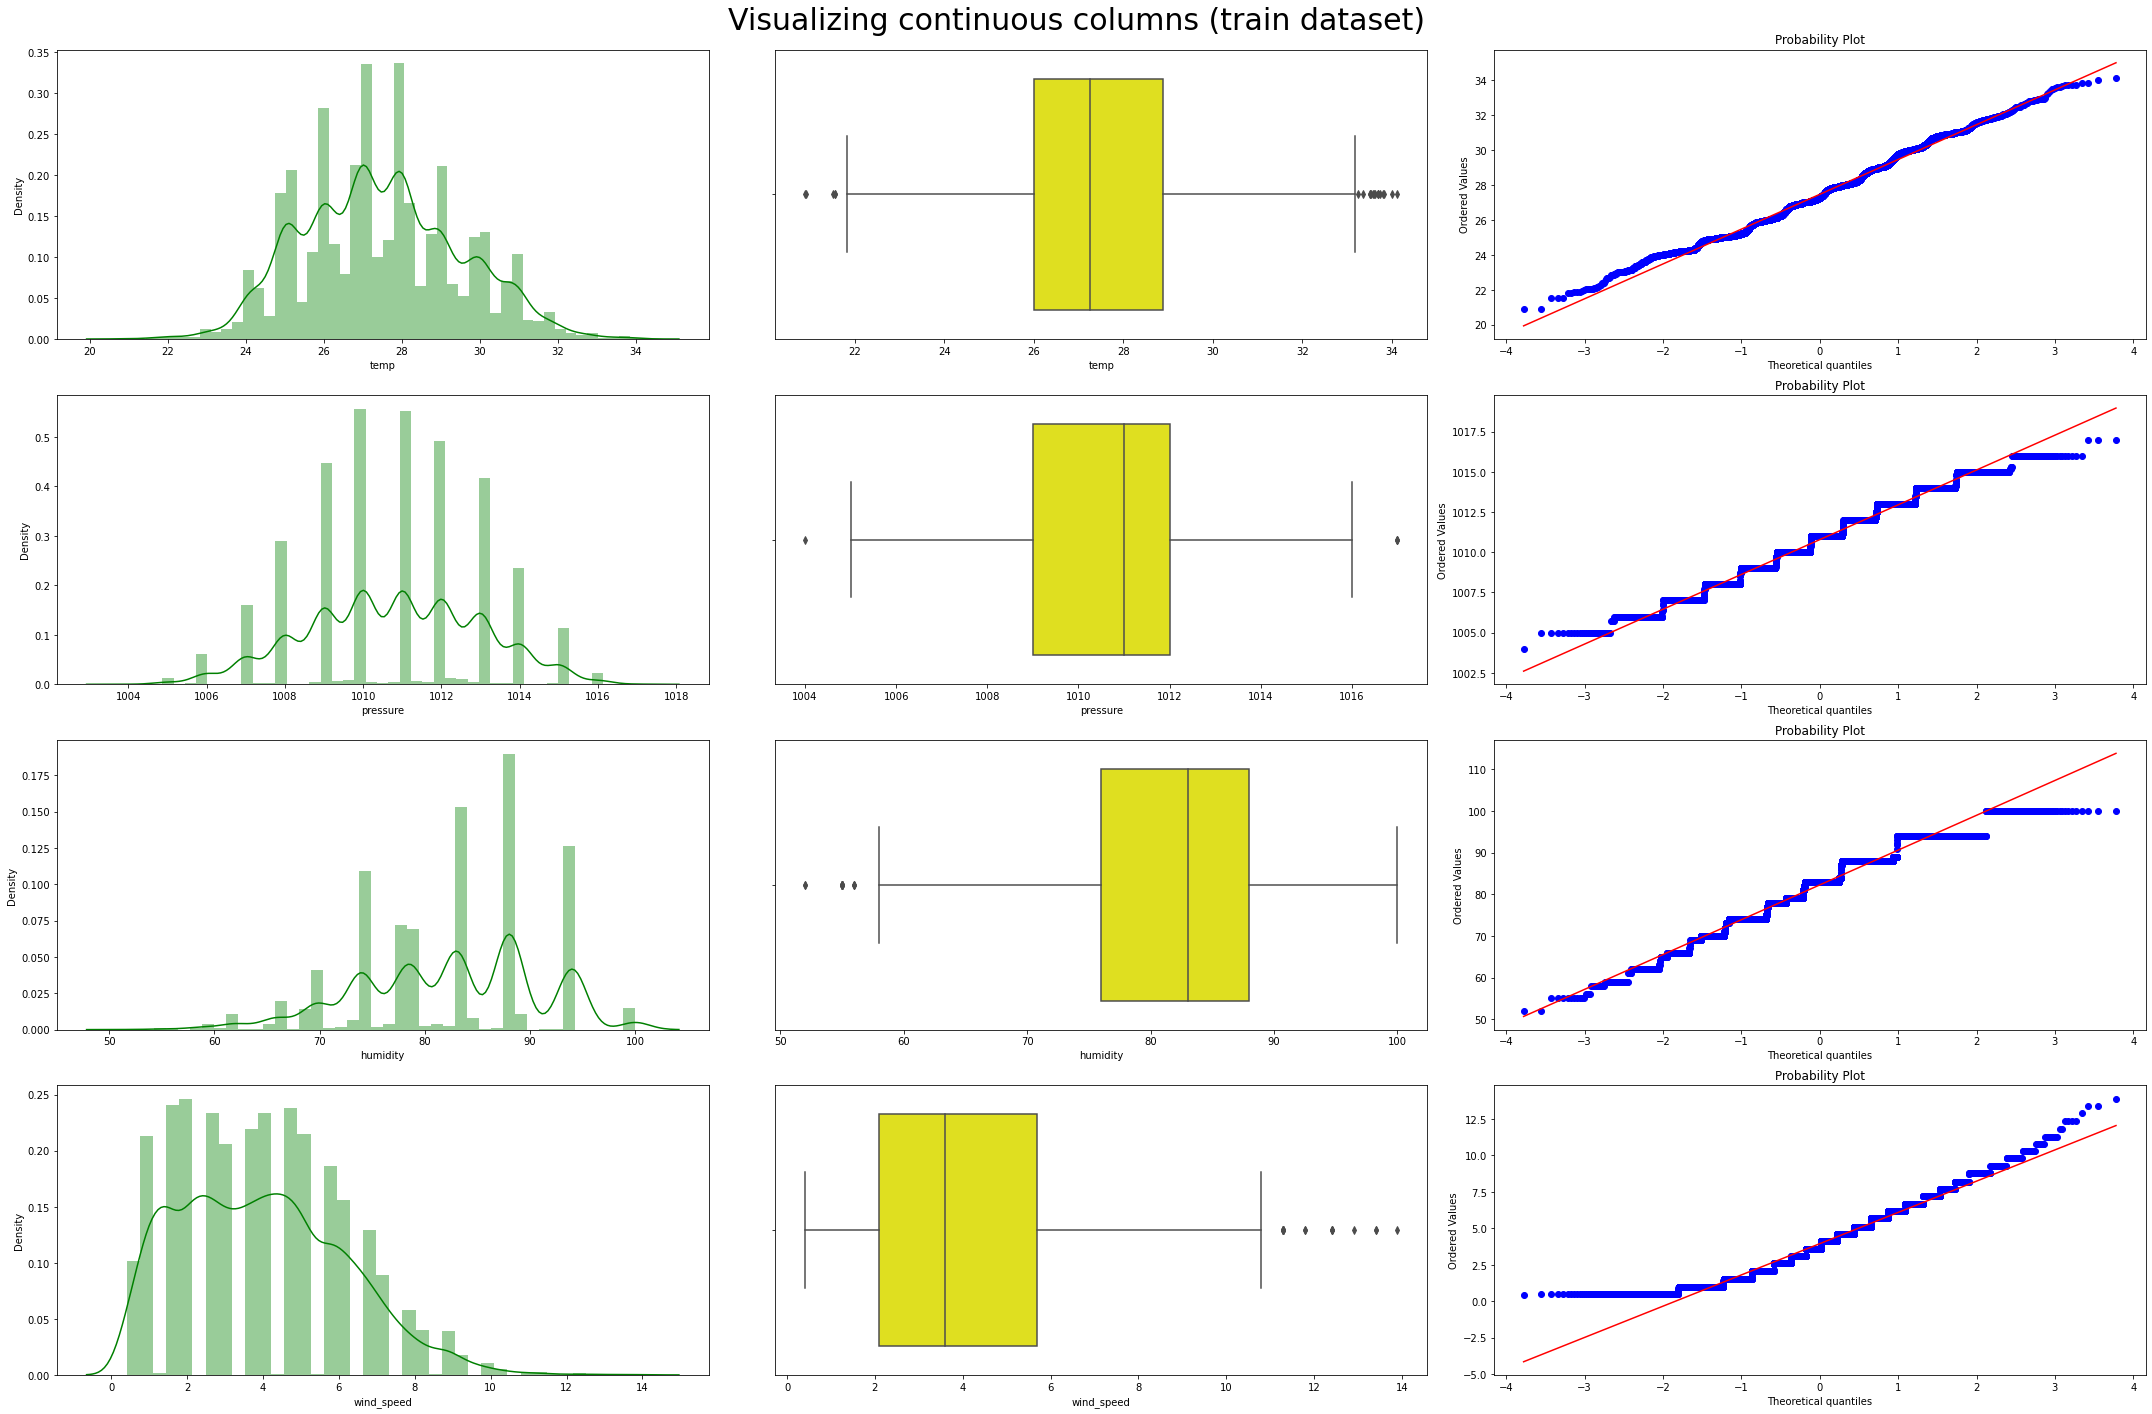

In [4]:
import warnings
numeric_features=['temp','pressure','humidity','wind_speed']
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),3,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(weather[i],ax=ax[index,0],color='green')
    sns.boxplot(weather[i],ax=ax[index,1],color='yellow')
    stats.probplot(weather[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

              Count  Percentage
weather_main                   
Clouds         8223    0.933477
Rain            586    0.066523


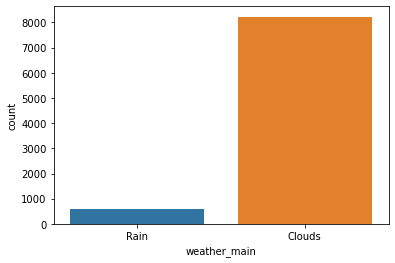

In [5]:
#Menghitung Jumlah data Target
sns.countplot(weather['weather_main'])
print(pd.DataFrame({'Count':weather.groupby('weather_main').size(),'Percentage': weather.groupby('weather_main').size() / len(weather)}))

Pertama dilakukan bentuk distirbusi untuk tiap jenis dari variabel target dengan hasil sbb. 
1. Secara umum ketiga feature (temperatur, kelembapan, dan tekanan udara, dan kecepatan angin) memiliki distribusi temperatur memiliki grafik yang cenderung berdistribusi normal.

2. Berdasarkan hasil grafik Box Plot juga menunjukkan ada beberapa outlier pada keempat data feature tersebut.

3. Berdasarkan data target, diperoleh deskripsi bahwa cuaca di dominasi oleh cuaca berasan dan hujan, sehingga terjadi imbalance pada data.

Hasil penggambaran grafik secara sekilas, Untuk data setelah split diperlukan adanya EDA kembali secara mendalam dan pengujian Hipotesis untuk melakukan metode penanganan pada masalah pada data train.

### Data Splitting

In [5]:
#LABEL ENCODING
from sklearn.preprocessing import StandardScaler,LabelEncoder
lc=LabelEncoder()
weather["weather_main"]=lc.fit_transform(weather["weather_main"])

weather

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,weather_main,weather_description
0,1/1/2019 0:00,27.13,1010.0,94,0.5,0,1,light rain
1,1/1/2019 1:00,27.77,1010.0,88,2.1,240,1,light rain
2,1/1/2019 2:00,29.53,1010.0,83,3.1,240,0,few clouds
3,1/1/2019 3:00,30.13,1010.0,79,4.1,260,0,few clouds
4,1/1/2019 4:00,30.15,1009.0,79,4.1,260,0,few clouds
...,...,...,...,...,...,...,...,...
8985,1/7/2020 19:00,27.00,1007.0,94,4.1,300,0,broken clouds
8986,1/7/2020 20:00,27.00,1007.0,94,5.7,300,0,broken clouds
8987,1/7/2020 21:00,28.00,1007.0,83,6.7,290,0,broken clouds
8988,1/7/2020 22:00,28.00,1007.0,83,6.2,290,0,scattered clouds


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
weather_f = weather.iloc[:, [1,2,3,4,5]]
weather_t = weather.iloc[:, [6]]
X_train, X_test, y_train, y_test=train_test_split(weather_f,weather_t,test_size=0.2,random_state=42)

In [7]:
X_train.head()

,temp,pressure,humidity,wind_speed,wind_deg
2452,27.93,1010.0,88,1.5,340
2839,29.87,1010.0,79,6.2,90
554,27.92,1007.0,74,8.8,280
8667,27.80,1009.0,78,1.0,0
1039,25.85,1013.0,88,2.6,310


In [8]:
y_train.head()

,weather_main
2452,0
2839,0
554,0
8667,0
1039,1


Berikut Hasil desriptif Statistik pada data Train:

In [17]:
# Deskriptif Statistik
print('Deskriptif Statistik Pada Dataset Train')
train_set = pd.concat([X_train,y_train])
round(train_set.describe(),2)

Deskriptif Statistik Pada Dataset Train


,temp,pressure,humidity,wind_speed,wind_deg,weather_main
count,7047.00,7047.00,7047.00,7047.00,7047.00,7047.00
mean,27.45,1010.80,82.26,3.96,155.16,0.06
std,2.00,2.18,8.50,2.19,96.03,0.25
min,20.89,1004.00,55.00,0.41,0.00,0.00
25%,25.97,1009.00,77.00,2.10,100.00,0.00
50%,27.26,1011.00,83.00,3.60,120.00,0.00
75%,28.87,1012.00,88.00,5.70,250.00,0.00
max,34.13,1016.00,100.00,13.40,360.00,1.00


### Exploratory Data Analysis (Phase 2)

In [12]:
# Distribusi
# Oultiler
# One Variate Anaylsis
# Bi Variate Analysis
# Statistical Testing

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

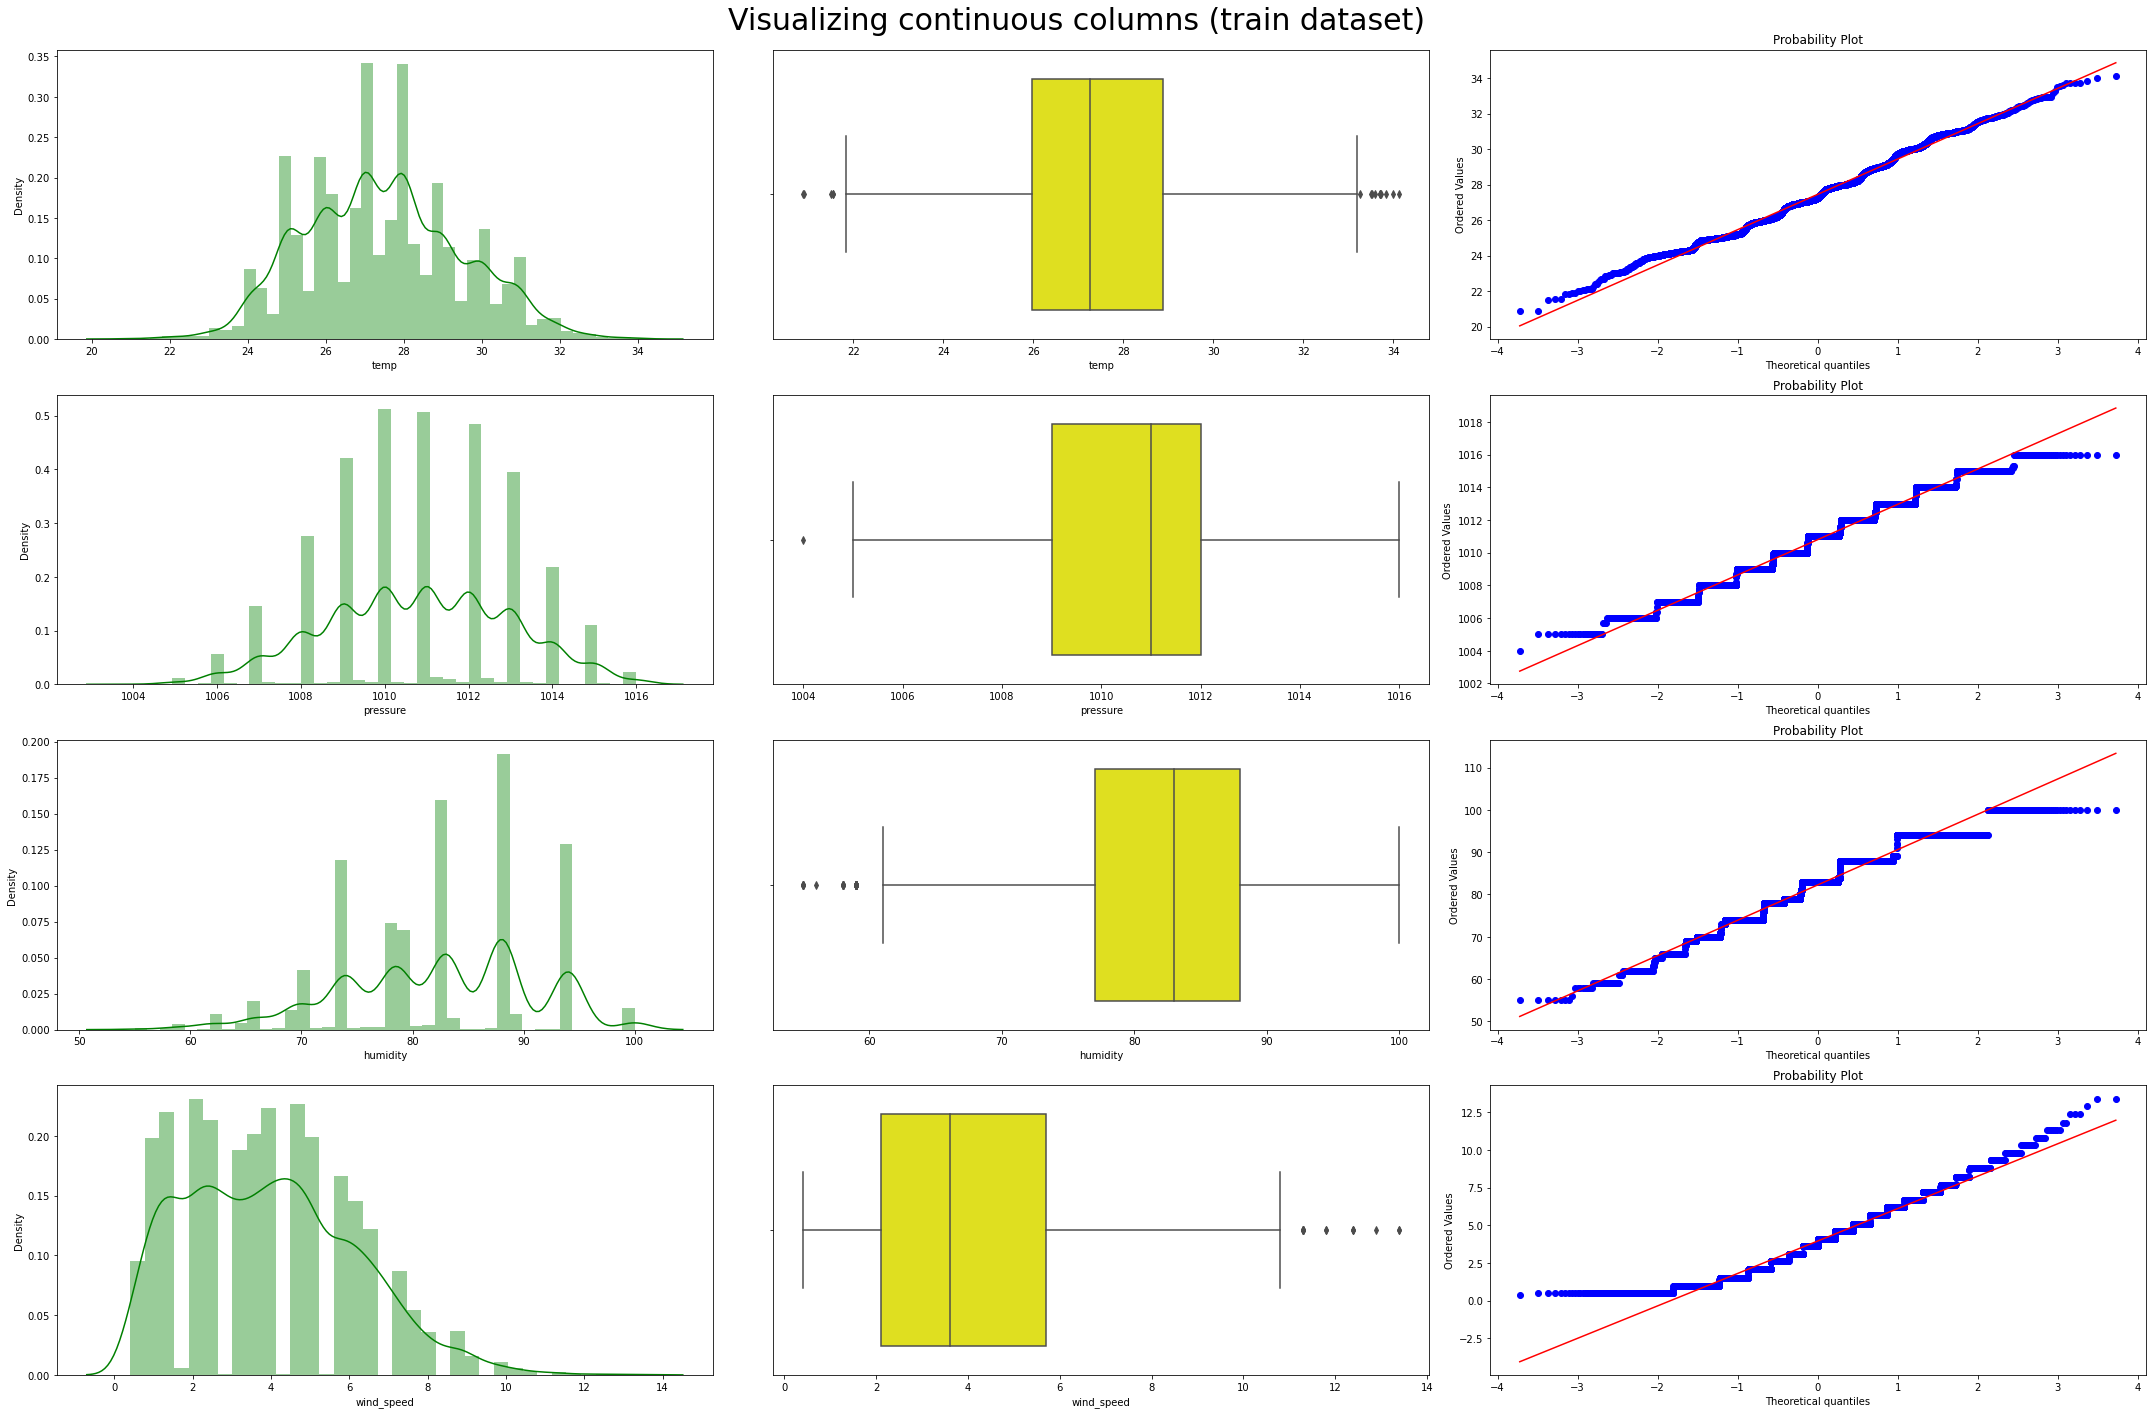

In [18]:
import warnings
numeric_features=['temp','pressure','humidity','wind_speed']
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),3,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(X_train[i],ax=ax[index,0],color='green')
    sns.boxplot(X_train[i],ax=ax[index,1],color='yellow')
    stats.probplot(X_train[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

Berdasarkan penggambaran grafik di atas, dapat dilihat bahwa distribusi seperti berbentuk kurva normal namun hal dapat di perkuat dengan pengujian statistik pada analisa selanjutnya. Serta pada grafik Box-Plot terdapat beberapa outlier sehingga perlu dilakukan scaller.

              Count  Percentage
weather_main                   
0              6593    0.935575
1               454    0.064425


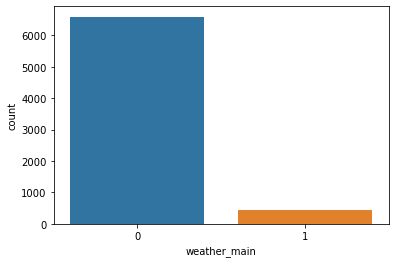

In [19]:
#Menghitung Jumlah data Target
sns.countplot(y_train['weather_main'])
print(pd.DataFrame({'Count':y_train.groupby('weather_main').size(),'Percentage': y_train.groupby('weather_main').size() / len(y_train)}))

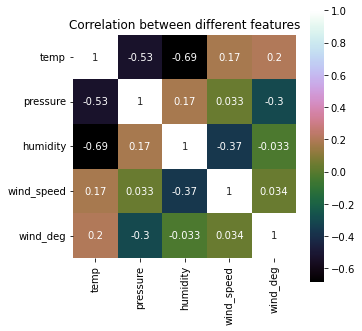

In [15]:
#Hitung Korelasi anatara data Fitur
correlation = X_train.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')
plt.show()

Berdasarkan hasil penggambaran matrix korelasi, dapat dilihat bahwa hubungan antar korelasi cukup rendah, jadi dapat menghidari adanya tumpang tindig korelasi antar variable (mutually Coreelation)

In [20]:
# Pengujian Statistik
# Untuk Data Numerik menggunakan Shapiro Walk Test
from scipy.stats import shapiro
# normality test
for feature in numeric_features:
    stat, p = shapiro(X_train[feature])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(f'Data Feature {feature} memiliki distribusi normal (H0 diterima)')
    else:
        print(f'Data Feature {feature} tidak memiliki distribusi normal (H0 ditolak)')

Statistics=0.992, p=0.000
Data Feature temp tidak memiliki distribusi normal (H0 ditolak)
Statistics=0.979, p=0.000
Data Feature pressure tidak memiliki distribusi normal (H0 ditolak)
Statistics=0.963, p=0.000
Data Feature humidity tidak memiliki distribusi normal (H0 ditolak)
Statistics=0.967, p=0.000
Data Feature wind_speed tidak memiliki distribusi normal (H0 ditolak)


In [21]:
# Pengujian Statistik
# Untuk data proporsi menggunakan Chi Square
from scipy.stats import chi2_contingency
# normality test
for feature in numeric_features:
    stat, p, dof, expected = chi2_contingency( X_train[feature])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
		    print(f'Data Feature {feature} memiliki proporsi sama (H0 diterima)')
    else:
		    print(f'Data Feature {feature} memiliki proporsi berbeda (H0 ditolak)')

Statistics=0.000, p=1.000
Data Feature temp memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature pressure memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature humidity memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature wind_speed memiliki proporsi sama (H0 diterima)


KESIMPULAN

Data training di atas memiliki permasalahan yaitu tidak berdistribusi normal serta memiliki Outlier sehingga perlu dilakukan scalling data, serta baik data training maupun target memiliki proporsi yang berbeda (Imbalance) sehingga perlu dilakukan Oversampling/Undersampling


### Data Preprocessing

In [18]:
# Handling Missing Unit
# Check Imbalance
# Enxcode variable
# Scalling

In [22]:
data_train=[X_train,y_train]
y_train['weather_main'] = pd.to_numeric(y_train['weather_main'], errors="coerce").fillna(0).astype('int64')
print (X_train.dtypes)
print (y_train.dtypes)


temp          float64
pressure      float64
humidity        int64
wind_speed    float64
wind_deg        int64
dtype: object
weather_main    int64
dtype: object


In [23]:
# Handling Imbalance
#Karena ada extirm Imbalance data maka:  
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2)
X_train_res, y_train_res =  oversample.fit_resample(X_train,y_train)
X_test_res, y_test_res =  oversample.fit_resample(X_test,y_test)

<AxesSubplot:xlabel='weather_main', ylabel='count'>

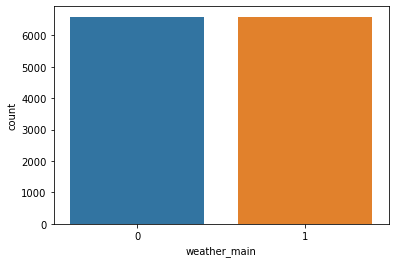

In [24]:
sns.countplot(y_train_res['weather_main'])

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train_res)
y_train_std=sc.fit_transform(y_train_res)
X_test_std=sc.fit_transform(X_test_res)
y_test_std=sc.fit_transform(y_test_res)


### Modelling

In [24]:
# Buat Baseline Model
# Modelling (cari model terbaik)
# Hyperparameter Tuning dari model terbaaik
# Prediciton Hasil(confusion matrix)

In [27]:
#Import Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [28]:
# Membuat Baseline Model
from sklearn.dummy import DummyClassifier
# Buat objek
dummy_clf = DummyClassifier(strategy = "most_frequent")

# Lakukan fit, untuk data y_train saja
dummy_clf.fit(X = X_train_std,
              y = y_train_res)
# Predict
y_pred_dummy = dummy_clf.predict(X_train_std)

# Tampilkan confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true = y_train_res,
                 y_pred = y_pred_dummy)

# [[tp, fp]]
# [[fn, tn]]

# Cari score
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train_res,
               y_pred = y_pred_dummy)

# Sama seperti proporsi kelas terbesar

0.5

model: DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      1630
           1       0.66      0.77      0.71      1630

    accuracy                           0.69      3260
   macro avg       0.70      0.69      0.69      3260
weighted avg       0.70      0.69      0.69      3260

------------------------------ 

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1630
           1       0.77      0.76      0.77      1630

    accuracy                           0.77      3260
   macro avg       0.77      0.77      0.77      3260
weighted avg       0.77      0.77      0.77      3260

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1630
           1       0.80      0.59      0.68      1630

    accuracy          

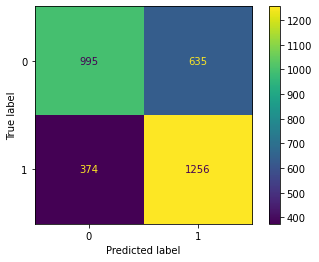

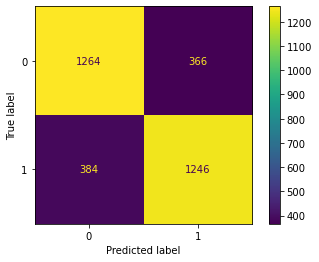

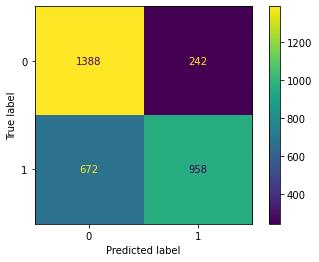

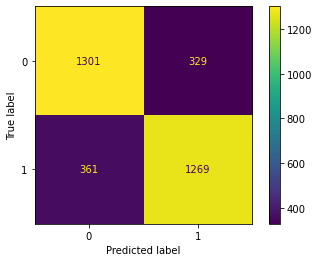

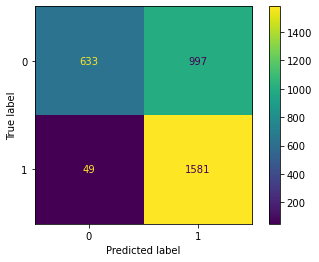

In [37]:
#Modelling
models = [DecisionTreeClassifier(),RandomForestClassifier(), KNeighborsClassifier(), SVC(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train_std, y_train_res)
    y_pred = m.predict(X_test_std)

    print(f'model: {str(m)}')
    print(classification_report(y_test_res,y_pred, zero_division=1))
    ConfusionMatrixDisplay.from_predictions(y_test_res, y_pred)
    print('-'*30, '\n')

Berdasarkan Hasil Pemodelan maka model yang baik adalan SVM sehingga selanjutnya paelu dilakukan Hyperparameter tuning untuk SVM.

In [31]:
# Buat weight class
n_samples = len(y_train)
n_classes = len(y_train.value_counts())
n_samples_j = y_train.value_counts()

class_weight = (n_classes * n_samples_j)/n_samples

# Buat objek
svc = SVC(class_weight = dict(class_weight),
          random_state = 123)
print('Kita kasih weight yang lebih besar untuk kelas 0')
class_weight

Kita kasih weight yang lebih besar untuk kelas 0


weather_main
0               1.871151
1               0.128849
dtype: float64

In [ ]:
#RANDOMIZED

In [29]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear']} 
SVM_Model = SVC(gamma='auto',
                class_weight = dict(class_weight),
                random_state = 123)

In [48]:
#Setup Random Search
from sklearn.model_selection import RandomizedSearchCV 
svc_RS = RandomizedSearchCV (estimator = SVM_Model,
                              param_distributions = param_grid,
                              n_iter = 10,
                              cv = 3, 
                              verbose=2, 
                              n_jobs = -1)

In [31]:
# Lakukan Fitting Data
svc_RS.fit(X = X_train_std,
           y = y_train_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=SVC(class_weight={(0,): 1.871150844330921,
                                               (1,): 0.12884915566907904},
                                 gamma='auto', random_state=123),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear']},
                   verbose=2)

Nilai C kecil, artinya

banyak titik yang bisa masuk ke dalam margin
ukuran margin besar
Apa itu masuk akal?

iya, karena data kita tidak separable

In [34]:
# Buat best model
svc = SVC(kernel = rf_Grid.best_params_["kernel"],
          C = rf_Grid.best_params_["C"],
          probability = True,
          class_weight = dict(class_weight),
          random_state = 123)

# Fit model
svc.fit(X_train_std, y_train_res)

SVC(C=0.1, class_weight={(0,): 1.871150844330921, (1,): 0.12884915566907904},
    kernel='linear', probability=True, random_state=123)

In [37]:
y_pred_train_svc = svc.predict(X_train_std)
y_pred_train_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_train_res,
                 y_pred = y_pred_train_svc)

# [[tp, fp]]
# [[fn, tn]]


array([[6593,    0],
       [6593,    0]], dtype=int64)

In [40]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_true = y_train_res,
                            y_pred = y_pred_train_svc,
                            target_names = ["Clouds", "Rain"]))

              precision    recall  f1-score   support

      Clouds       0.50      1.00      0.67      6593
        Rain       0.00      0.00      0.00      6593

    accuracy                           0.50     13186
   macro avg       0.25      0.50      0.33     13186
weighted avg       0.25      0.50      0.33     13186

